In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import matplotlib as mpl
import seaborn as sns  
from scipy.stats import norm
from scipy.stats import ttest_ind
import statistics
from IPython.display import Image
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
df= pd.read_csv(r"C:\Users\nikit\Desktop\healthdataset\sanga\final_merge.csv")

In [3]:
display(df.head(n=100))

# show the shape of the data (Number of rows, number of columns)
print("Shape: " + str(df.shape))

,bill_id,amount,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,...,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,10/22/2012,11/3/2012,0,0.0,0,0,0.0,...,1,17.6,31.8,98,65.1,166,Female,Malay,Singaporean,5/15/1967
1,7968360812,951.214467,1d21f2be18683991eb93d182d6b2d220,1/1/2011,1/11/2011,0,1.0,0,0,0.0,...,1,13.2,30.9,123,71.3,161,Male,Indian,Singaporean,12/19/1976
2,7512568183,12338.269970,1d21f2be18683991eb93d182d6b2d220,1/1/2011,1/11/2011,0,1.0,0,0,0.0,...,1,13.2,30.9,123,71.3,161,Male,Indian,Singaporean,12/19/1976
3,7654730355,1133.601902,1d21f2be18683991eb93d182d6b2d220,1/1/2011,1/11/2011,0,1.0,0,0,0.0,...,1,13.2,30.9,123,71.3,161,Male,Indian,Singaporean,12/19/1976
4,1692196063,982.332324,1d21f2be18683991eb93d182d6b2d220,1/1/2011,1/11/2011,0,1.0,0,0,0.0,...,1,13.2,30.9,123,71.3,161,Male,Indian,Singaporean,12/19/1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5790218827,662.557231,7f8e1a194c89076622a7f99cd835e170,1/14/2011,1/22/2011,0,1.0,1,0,0.0,...,1,16.4,27.5,106,68.2,167,Male,Indian,Singapore citizen,10/12/1947
96,9037494597,393.929020,ab1318e8893ee9805872445be90cc74e,5/2/2015,5/14/2015,0,1.0,0,0,0.0,...,0,13.9,27.2,105,88.3,168,Male,chinese,Singapore citizen,2/13/1967
97,5435128952,11957.698640,c59af905597b9be72420bbdbdad2ce42,1/10/2011,1/22/2011,0,NaN,0,0,NaN,...,0,15.6,30.9,87,71.1,177,Male,Chinese,Singaporean,10/2/1958
98,4834088487,933.087840,c59af905597b9be72420bbdbdad2ce42,1/10/2011,1/22/2011,0,NaN,0,0,NaN,...,0,15.6,30.9,87,71.1,177,Male,Chinese,Singaporean,10/2/1958


Shape: (13600, 32)


In [4]:
# To display the top 5 rows 
df.head(10)  


,bill_id,amount,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,...,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,10/22/2012,11/3/2012,0,0.0,0,0,0.0,...,1,17.6,31.8,98,65.1,166,Female,Malay,Singaporean,5/15/1967
1,7968360812,951.214467,1d21f2be18683991eb93d182d6b2d220,1/1/2011,1/11/2011,0,1.0,0,0,0.0,...,1,13.2,30.9,123,71.3,161,Male,Indian,Singaporean,12/19/1976
2,7512568183,12338.269970,1d21f2be18683991eb93d182d6b2d220,1/1/2011,1/11/2011,0,1.0,0,0,0.0,...,1,13.2,30.9,123,71.3,161,Male,Indian,Singaporean,12/19/1976
3,7654730355,1133.601902,1d21f2be18683991eb93d182d6b2d220,1/1/2011,1/11/2011,0,1.0,0,0,0.0,...,1,13.2,30.9,123,71.3,161,Male,Indian,Singaporean,12/19/1976
4,1692196063,982.332324,1d21f2be18683991eb93d182d6b2d220,1/1/2011,1/11/2011,0,1.0,0,0,0.0,...,1,13.2,30.9,123,71.3,161,Male,Indian,Singaporean,12/19/1976
5,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,9/28/2014,10/11/2014,0,0.0,0,0,0.0,...,0,16.3,29.1,94,72.5,162,Female,chinese,Singapore citizen,5/28/1973
6,5243221793,8247.773511,796de06efdad342d3f3a379dff0bd63c,9/28/2014,10/11/2014,0,0.0,0,0,0.0,...,0,16.3,29.1,94,72.5,162,Female,chinese,Singapore citizen,5/28/1973
7,6180579974,19900.297090,62bdca0b95d97e99e1c712048fb9fd09,1/1/2011,1/11/2011,0,0.0,0,0,0.0,...,1,13.8,22.6,89,78.4,160,Female,Malay,Singaporean,7/20/1978
8,3762633379,1145.372193,62bdca0b95d97e99e1c712048fb9fd09,1/1/2011,1/11/2011,0,0.0,0,0,0.0,...,1,13.8,22.6,89,78.4,160,Female,Malay,Singaporean,7/20/1978
9,784133534,1362.347484,62bdca0b95d97e99e1c712048fb9fd09,1/1/2011,1/11/2011,0,0.0,0,0,0.0,...,1,13.8,22.6,89,78.4,160,Female,Malay,Singaporean,7/20/1978


In [5]:
#to display the last 5 rows
df.tail(10)

,bill_id,amount,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,...,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth
13590,5977898065,2132.844435,b980ee36befb4654b0164325d895c216,11/23/2015,12/3/2015,0,1.0,0,0,0.0,...,1,16.9,23.2,110,78.8,162,Female,Malay,Singapore citizen,9/14/1950
13591,1777779533,1679.257237,53f75e54d6bbc965d9b58ddfb8314dee,12/7/2015,12/21/2015,0,0.0,0,0,0.0,...,0,16.2,24.2,86,79.9,160,Female,chinese,Singapore citizen,8/22/1978
13592,4957551588,1599.284619,4e20179c651493a3547d597fc0abfe78,11/28/2015,12/10/2015,1,1.0,0,0,0.0,...,1,16.1,24.5,77,66.3,158,Female,Chinese,PR,12/17/1932
13593,2038812966,14550.841560,8b3ece3c224a1047f7db1f8b056afc2b,11/28/2015,12/10/2015,0,0.0,0,0,0.0,...,0,12.4,29.7,114,76.7,156,Female,Indian,Singaporean,5/28/1940
13594,6541704034,2931.240651,c4e4a24e744e18a93d616a3e8aabb7c8,12/20/2015,12/28/2015,0,1.0,0,0,0.0,...,1,13.0,30.9,84,76.8,171,Female,Malay,Foreigner,1/21/1969
13595,4065090475,620.829155,91edf6bc00d6fc46bd5a18a5c53783de,12/2/2015,12/11/2015,0,0.0,0,0,NaN,...,1,11.7,25.9,109,60.2,165,Female,Others,Singapore citizen,10/7/1975
13596,555144179,813.921621,80c4d7e0a93e353e201cb83c776b0bad,12/25/2015,1/3/2016,0,0.0,0,0,0.0,...,0,15.8,26.6,72,72.2,157,Female,chinese,Singaporean,3/27/1969
13597,1665922870,894.944980,3f052a68d7c25d817a63aa1ba70f4dc2,12/21/2015,1/6/2016,0,0.0,0,0,0.0,...,1,12.9,27.9,106,84.8,162,Female,Chinese,Singaporean,6/22/1943
13598,498923109,14042.594000,4f67a54ab205cc9e7e2b0a4ee08e4fba,12/28/2015,1/7/2016,0,0.0,0,0,0.0,...,1,11.6,27.9,107,72.7,155,Female,Chinese,Singaporean,8/7/1970
13599,5352657730,950.002925,4368c266084e640c469a5d41b339805c,12/26/2015,1/7/2016,0,0.0,0,0,0.0,...,1,13.8,28.6,129,79.5,167,Female,Chinese,Singaporean,1/5/1964


In [6]:
df.dtypes

bill_id                 int64
amount                float64
patient_id             object
date_of_admission      object
date_of_discharge      object
medical_history_1       int64
medical_history_2     float64
medical_history_3      object
medical_history_4       int64
medical_history_5     float64
medical_history_6       int64
medical_history_7       int64
preop_medication_1      int64
preop_medication_2      int64
preop_medication_3      int64
preop_medication_4      int64
preop_medication_5      int64
preop_medication_6      int64
symptom_1               int64
symptom_2               int64
symptom_3               int64
symptom_4               int64
symptom_5               int64
lab_result_1          float64
lab_result_2          float64
lab_result_3            int64
weight                float64
height                  int64
gender                 object
race                   object
resident_status        object
date_of_birth          object
dtype: object

In [7]:
df.columns

Index(['bill_id', 'amount', 'patient_id', 'date_of_admission',
       'date_of_discharge', 'medical_history_1', 'medical_history_2',
       'medical_history_3', 'medical_history_4', 'medical_history_5',
       'medical_history_6', 'medical_history_7', 'preop_medication_1',
       'preop_medication_2', 'preop_medication_3', 'preop_medication_4',
       'preop_medication_5', 'preop_medication_6', 'symptom_1', 'symptom_2',
       'symptom_3', 'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'gender', 'race', 'resident_status',
       'date_of_birth'],
      dtype='object')

In [8]:
# list columns with their non-null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bill_id             13600 non-null  int64  
 1   amount              13600 non-null  float64
 2   patient_id          13600 non-null  object 
 3   date_of_admission   13600 non-null  object 
 4   date_of_discharge   13600 non-null  object 
 5   medical_history_1   13600 non-null  int64  
 6   medical_history_2   12668 non-null  float64
 7   medical_history_3   13600 non-null  object 
 8   medical_history_4   13600 non-null  int64  
 9   medical_history_5   12384 non-null  float64
 10  medical_history_6   13600 non-null  int64  
 11  medical_history_7   13600 non-null  int64  
 12  preop_medication_1  13600 non-null  int64  
 13  preop_medication_2  13600 non-null  int64  
 14  preop_medication_3  13600 non-null  int64  
 15  preop_medication_4  13600 non-null  int64  
 16  preo

In [9]:
#unique values of all the columns count
df.nunique()

bill_id               13600
amount                13595
patient_id             3000
date_of_admission      1450
date_of_discharge      1532
medical_history_1         2
medical_history_2         2
medical_history_3         4
medical_history_4         2
medical_history_5         2
medical_history_6         2
medical_history_7         2
preop_medication_1        2
preop_medication_2        2
preop_medication_3        2
preop_medication_4        2
preop_medication_5        2
preop_medication_6        2
symptom_1                 2
symptom_2                 2
symptom_3                 2
symptom_4                 2
symptom_5                 2
lab_result_1             98
lab_result_2            148
lab_result_3             90
weight                  522
height                   35
gender                    4
race                      6
resident_status           4
date_of_birth          2746
dtype: int64

In [10]:
#displaying null values/identifying missing values
df.isnull().sum()

bill_id                  0
amount                   0
patient_id               0
date_of_admission        0
date_of_discharge        0
medical_history_1        0
medical_history_2      932
medical_history_3        0
medical_history_4        0
medical_history_5     1216
medical_history_6        0
medical_history_7        0
preop_medication_1       0
preop_medication_2       0
preop_medication_3       0
preop_medication_4       0
preop_medication_5       0
preop_medication_6       0
symptom_1                0
symptom_2                0
symptom_3                0
symptom_4                0
symptom_5                0
lab_result_1             0
lab_result_2             0
lab_result_3             0
weight                   0
height                   0
gender                   0
race                     0
resident_status          0
date_of_birth            0
dtype: int64

In [11]:
#deleting rows with missing values
df=df.dropna()
df

,bill_id,amount,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,...,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,10/22/2012,11/3/2012,0,0.0,0,0,0.0,...,1,17.6,31.8,98,65.1,166,Female,Malay,Singaporean,5/15/1967
1,7968360812,951.214467,1d21f2be18683991eb93d182d6b2d220,1/1/2011,1/11/2011,0,1.0,0,0,0.0,...,1,13.2,30.9,123,71.3,161,Male,Indian,Singaporean,12/19/1976
2,7512568183,12338.269970,1d21f2be18683991eb93d182d6b2d220,1/1/2011,1/11/2011,0,1.0,0,0,0.0,...,1,13.2,30.9,123,71.3,161,Male,Indian,Singaporean,12/19/1976
3,7654730355,1133.601902,1d21f2be18683991eb93d182d6b2d220,1/1/2011,1/11/2011,0,1.0,0,0,0.0,...,1,13.2,30.9,123,71.3,161,Male,Indian,Singaporean,12/19/1976
4,1692196063,982.332324,1d21f2be18683991eb93d182d6b2d220,1/1/2011,1/11/2011,0,1.0,0,0,0.0,...,1,13.2,30.9,123,71.3,161,Male,Indian,Singaporean,12/19/1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,6541704034,2931.240651,c4e4a24e744e18a93d616a3e8aabb7c8,12/20/2015,12/28/2015,0,1.0,0,0,0.0,...,1,13.0,30.9,84,76.8,171,Female,Malay,Foreigner,1/21/1969
13596,555144179,813.921621,80c4d7e0a93e353e201cb83c776b0bad,12/25/2015,1/3/2016,0,0.0,0,0,0.0,...,0,15.8,26.6,72,72.2,157,Female,chinese,Singaporean,3/27/1969
13597,1665922870,894.944980,3f052a68d7c25d817a63aa1ba70f4dc2,12/21/2015,1/6/2016,0,0.0,0,0,0.0,...,1,12.9,27.9,106,84.8,162,Female,Chinese,Singaporean,6/22/1943
13598,498923109,14042.594000,4f67a54ab205cc9e7e2b0a4ee08e4fba,12/28/2015,1/7/2016,0,0.0,0,0,0.0,...,1,11.6,27.9,107,72.7,155,Female,Chinese,Singaporean,8/7/1970


In [12]:
#displaying df after removal of null values
df.isnull().sum()

bill_id               0
amount                0
patient_id            0
date_of_admission     0
date_of_discharge     0
medical_history_1     0
medical_history_2     0
medical_history_3     0
medical_history_4     0
medical_history_5     0
medical_history_6     0
medical_history_7     0
preop_medication_1    0
preop_medication_2    0
preop_medication_3    0
preop_medication_4    0
preop_medication_5    0
preop_medication_6    0
symptom_1             0
symptom_2             0
symptom_3             0
symptom_4             0
symptom_5             0
lab_result_1          0
lab_result_2          0
lab_result_3          0
weight                0
height                0
gender                0
race                  0
resident_status       0
date_of_birth         0
dtype: int64

In [13]:
#finding unique values in columns and count of the values
df['medical_history_3'].value_counts()

0      7448
No     2552
1      1196
Yes     396
Name: medical_history_3, dtype: int64

In [14]:
df['gender'].value_counts()

Female    5404
Male      5112
m          704
f          372
Name: gender, dtype: int64

In [15]:
df['race'].value_counts()

Chinese    6176
Malay      2392
chinese    1244
Indian      808
Others      600
India       372
Name: race, dtype: int64

In [71]:
#replacing values
df['medical_history_3'] = df['medical_history_3'].replace(['No','Yes'],['0','1'])
print (df['medical_history_3'].value_counts())

0    10000
1     1592
Name: medical_history_3, dtype: int64


In [17]:
df['gender'] = df['gender'].replace(['m','f'],['Male','Female'])
print (df['gender'].value_counts())

Male      5816
Female    5776
Name: gender, dtype: int64


In [18]:
df['race'] = df['race'].replace(['chinese','India'],['Chinese','Indian'])
print (df['race'].value_counts())

Chinese    7420
Malay      2392
Indian     1180
Others      600
Name: race, dtype: int64


In [19]:
#adding calculated columns

In [20]:
df['date_of_admission'] = df['date_of_admission'].str.split('(', expand=True)[0]
df['date_of_birth'] = df['date_of_birth'].str.split('(', expand=True)[0]

In [21]:
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'],format='%m%d%Y')
df['year'] = pd.DatetimeIndex(df['date_of_admission']).year

ValueError: time data '10/22/2012' does not match format '%m%d%Y' (match)

In [22]:
#converting column into datatime column
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'])
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['date_of_discharge'] = pd.to_datetime(df['date_of_discharge'])

In [23]:
import datetime
#adding age column by date of birth from date of admission and dividing by 365
days = df['date_of_admission'] - df['date_of_birth']
df['age'] = days.dt.days / 365

In [24]:
print (df.age)

0        45.471233
1        34.057534
2        34.057534
3        34.057534
4        34.057534
           ...    
13594    46.942466
13596    46.778082
13597    72.547945
13598    45.421918
13599    52.008219
Name: age, Length: 11592, dtype: float64


In [25]:
#calculating age group
df['agegrp']=pd.cut(df.age, [20,30,40,50,60,70,80,90])

In [26]:
print (df.agegrp)

0        (40, 50]
1        (30, 40]
2        (30, 40]
3        (30, 40]
4        (30, 40]
           ...   
13594    (40, 50]
13596    (40, 50]
13597    (70, 80]
13598    (40, 50]
13599    (50, 60]
Name: agegrp, Length: 11592, dtype: category
Categories (7, interval[int64]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]


In [27]:
#calculating no.of days in hospital by subtracting date of admission from date of discharge
days1 = df['date_of_discharge'] - df['date_of_admission']
df['no_of_hospitalized_days'] = days1.dt.days

In [28]:
print (df.no_of_hospitalized_days)

0        12
1        10
2        10
3        10
4        10
         ..
13594     8
13596     9
13597    16
13598    10
13599    12
Name: no_of_hospitalized_days, Length: 11592, dtype: int64


In [29]:
#calculating the sum of amount of the patients based on patient_id
df['sum'] = df['amount'].groupby(df['patient_id']).transform('sum')

In [30]:
print (df.sum)

<bound method DataFrame.sum of           bill_id        amount                        patient_id  \
0        40315104   1552.634830  96a76ec5bbcb1d1562c40b9b972e356d   
1      7968360812    951.214467  1d21f2be18683991eb93d182d6b2d220   
2      7512568183  12338.269970  1d21f2be18683991eb93d182d6b2d220   
3      7654730355   1133.601902  1d21f2be18683991eb93d182d6b2d220   
4      1692196063    982.332324  1d21f2be18683991eb93d182d6b2d220   
...           ...           ...                               ...   
13594  6541704034   2931.240651  c4e4a24e744e18a93d616a3e8aabb7c8   
13596   555144179    813.921621  80c4d7e0a93e353e201cb83c776b0bad   
13597  1665922870    894.944980  3f052a68d7c25d817a63aa1ba70f4dc2   
13598   498923109  14042.594000  4f67a54ab205cc9e7e2b0a4ee08e4fba   
13599  5352657730    950.002925  4368c266084e640c469a5d41b339805c   

      date_of_admission date_of_discharge  medical_history_1  \
0            2012-10-22        2012-11-03                  0   
1           

In [31]:
#calculating bmi using height and weight
df['bmi'] = df['weight']/(df['height']*2)*100

In [32]:
print (df.bmi)

0        19.608434
1        22.142857
2        22.142857
3        22.142857
4        22.142857
           ...    
13594    22.456140
13596    22.993631
13597    26.172840
13598    23.451613
13599    23.802395
Name: bmi, Length: 11592, dtype: float64


In [33]:
df.describe()

,bill_id,amount,medical_history_1,medical_history_2,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,age,no_of_hospitalized_days,sum,bmi
count,1.159200e+04,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,...,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000
mean,5.017474e+09,5486.475124,0.171498,0.317460,0.054520,0.064872,0.256384,0.253968,0.500345,0.587647,...,0.528295,14.458109,27.421843,99.517253,78.860041,165.133540,52.465273,11.045894,26517.781918,23.881336
std,2.890795e+09,7753.115519,0.376959,0.465508,0.227051,0.246311,0.436655,0.435298,0.500021,0.492279,...,0.499220,1.746298,2.483473,15.295323,11.031945,7.031765,14.710115,2.865091,15288.494345,3.215208
min,5.584120e+05,79.496707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,9.100000,19.700000,57.000000,48.000000,151.000000,21.728767,1.000000,2946.100355,14.882353
25%,2.495865e+09,955.047991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,13.200000,25.700000,88.000000,71.300000,160.000000,39.660274,9.000000,16041.039284,21.752874
50%,5.029044e+09,1524.094760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,14.400000,27.400000,100.000000,79.000000,165.000000,50.527397,11.000000,22874.373099,23.945783
75%,7.541999e+09,7369.391898,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,15.700000,29.200000,110.000000,86.400000,171.000000,65.038356,13.000000,32958.739736,26.052632
max,9.999633e+09,81849.751340,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,20.300000,35.100000,150.000000,121.000000,186.000000,85.298630,20.000000,167641.308468,35.941558


In [72]:
df.head()

,bill_id,amount,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,...,height,gender,race,resident_status,date_of_birth,age,agegrp,no_of_hospitalized_days,sum,bmi
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,...,166,Female,Malay,Singaporean,1967-05-15,45.471233,"(40, 50]",12,32674.053703,19.608434
1,7968360812,951.214467,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,...,161,Male,Indian,Singaporean,1976-12-19,34.057534,"(30, 40]",10,35305.000362,22.142857
2,7512568183,12338.269970,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,...,161,Male,Indian,Singaporean,1976-12-19,34.057534,"(30, 40]",10,35305.000362,22.142857
3,7654730355,1133.601902,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,...,161,Male,Indian,Singaporean,1976-12-19,34.057534,"(30, 40]",10,35305.000362,22.142857
4,1692196063,982.332324,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,...,161,Male,Indian,Singaporean,1976-12-19,34.057534,"(30, 40]",10,35305.000362,22.142857


In [34]:
#dropping duplicate values
#dropping based on patient_id

In [73]:
df=df.drop_duplicates(subset=['patient_id'])

In [74]:
df

,bill_id,amount,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,...,height,gender,race,resident_status,date_of_birth,age,agegrp,no_of_hospitalized_days,sum,bmi
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,...,166,Female,Malay,Singaporean,1967-05-15,45.471233,"(40, 50]",12,32674.053703,19.608434
1,7968360812,951.214467,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,...,161,Male,Indian,Singaporean,1976-12-19,34.057534,"(30, 40]",10,35305.000362,22.142857
5,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28,2014-10-11,0,0.0,0,0,0.0,...,162,Female,Chinese,Singapore citizen,1973-05-28,41.364384,"(40, 50]",13,19018.637468,22.376543
7,6180579974,19900.297090,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,...,160,Female,Malay,Singaporean,1978-07-20,32.473973,"(30, 40]",10,23303.000928,24.500000
12,1148334643,6469.605351,1ce104904e9160cf3cfdb3c45b9ce4ff,2014-01-16,2014-01-26,1,1.0,1,0,1.0,...,162,Female,Chinese,PR,1980-06-21,33.594521,"(30, 40]",10,22370.242819,21.296296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,5712227072,638.074319,28aa9246d21de1b9f9f8cd1f742d5733,2015-03-12,2015-03-24,0,0.0,0,0,0.0,...,164,Male,Chinese,Singaporean,1976-05-04,38.879452,"(30, 40]",12,17120.101741,29.756098
12612,3678243722,650.596942,68c642c760c751964a6a42f952d76fe2,2015-09-10,2015-09-22,0,1.0,1,0,1.0,...,164,Female,Chinese,Singaporean,1970-05-18,45.345205,"(40, 50]",12,12519.877826,20.701220
12854,2447651173,26628.607860,96848594151ac33f3192a3483af09753,2015-05-13,2015-05-27,0,0.0,0,0,1.0,...,165,Male,Malay,Singapore citizen,1980-02-19,35.252055,"(30, 40]",14,30579.480414,22.969697
12892,7507162691,1473.572382,67d5260621d5602bed05ec588d9c3ccf,2015-01-07,2015-01-20,0,1.0,1,0,0.0,...,151,Female,Chinese,Singapore citizen,1944-07-21,70.512329,"(70, 80]",13,31241.847514,26.225166


In [75]:
df.head()

,bill_id,amount,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,...,height,gender,race,resident_status,date_of_birth,age,agegrp,no_of_hospitalized_days,sum,bmi
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,...,166,Female,Malay,Singaporean,1967-05-15,45.471233,"(40, 50]",12,32674.053703,19.608434
1,7968360812,951.214467,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,...,161,Male,Indian,Singaporean,1976-12-19,34.057534,"(30, 40]",10,35305.000362,22.142857
5,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28,2014-10-11,0,0.0,0,0,0.0,...,162,Female,Chinese,Singapore citizen,1973-05-28,41.364384,"(40, 50]",13,19018.637468,22.376543
7,6180579974,19900.297090,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,...,160,Female,Malay,Singaporean,1978-07-20,32.473973,"(30, 40]",10,23303.000928,24.500000
12,1148334643,6469.605351,1ce104904e9160cf3cfdb3c45b9ce4ff,2014-01-16,2014-01-26,1,1.0,1,0,1.0,...,162,Female,Chinese,PR,1980-06-21,33.594521,"(30, 40]",10,22370.242819,21.296296


In [36]:
#DATA ANALYSIS/VISUALIZATION

In [37]:
#UNIVARIATE ANALYSIS - NUMERIC VARIABLES

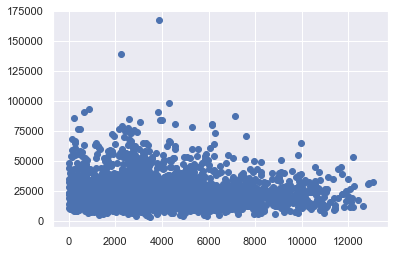

In [76]:
#scatter plot for amount
plt.scatter(df.index,df['sum'])
plt.show()

<AxesSubplot:ylabel='amount'>

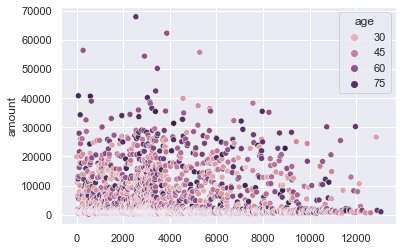

In [77]:
sns.scatterplot(x=df.index,y=df.amount,hue=df.age)

<AxesSubplot:ylabel='Density'>

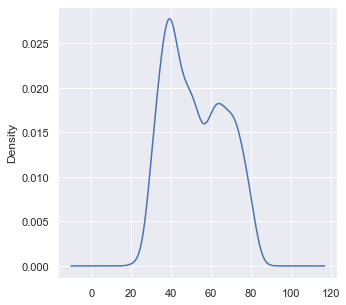

In [78]:
#density plot for age 
plt.figure(figsize=(5,5))
df.age.plot(kind='density')

(array([  3.,  19., 113., 374., 626., 640., 511., 259.,  57.,   6.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

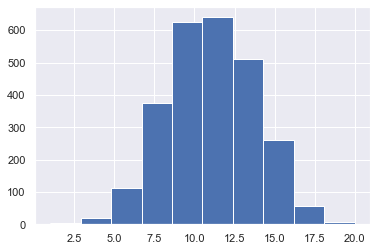

In [79]:
#histogram for no. of days hospitalized
plt.hist(df.no_of_hospitalized_days)

C:\Users\nikit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of age')

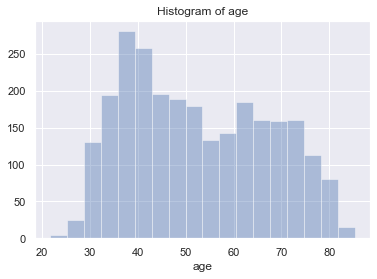

In [80]:
#histogram of age
sns.distplot(df['age'], kde =False).set_title("Histogram of age")

Text(0.5, 1.0, 'Histogram of symptom_5')

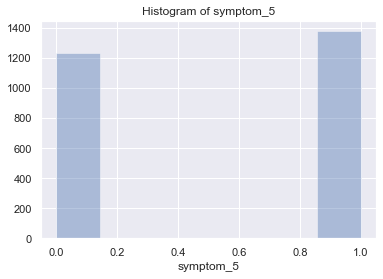

In [104]:
sns.distplot(df['symptom_5'], kde =False).set_title("Histogram of symptom_5")

Text(0.5, 1.0, 'Histogram of symptom_3')

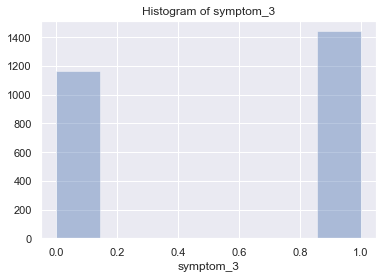

In [103]:
sns.distplot(df['symptom_3'], kde =False).set_title("Histogram of symptom_3")

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f996cab550>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f996c68b50>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f996caba00>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f996cabd00>,
 'cmedians': <matplotlib.collections.LineCollection at 0x1f996c68ac0>}

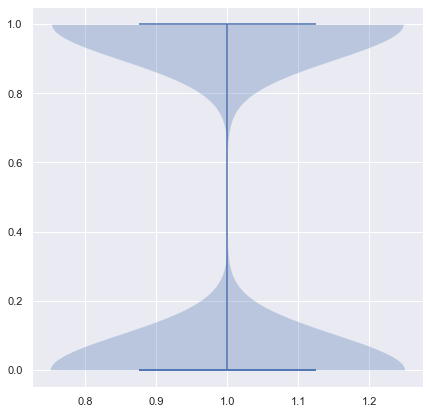

In [81]:
#violin plot for preop medication 3 
plt.figure(figsize=(7,7))
plt.violinplot(df.preop_medication_1,showmedians=True)

##UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES

Text(0.5, 0, 'date_of_admission')

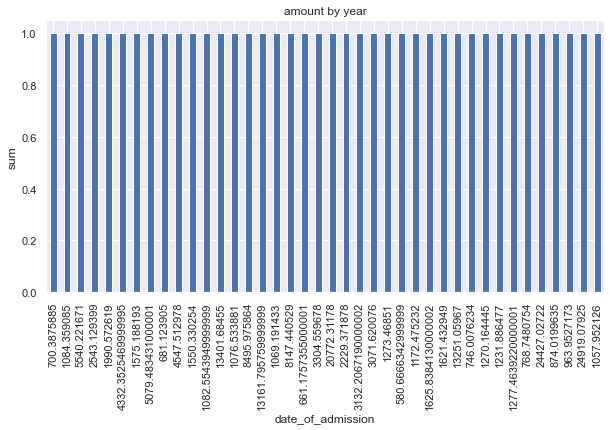

In [82]:
#Analysis of one variable with count 
df.amount.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("amount by year")
plt.ylabel('sum')
plt.xlabel('date_of_admission')

Text(0.5, 0, 'resident_status')

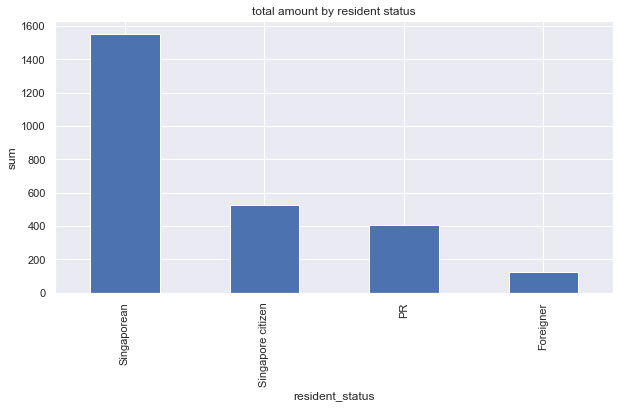

In [83]:
#Analysis of one variable with count 
df.resident_status.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("total amount by resident status")
plt.ylabel('sum')
plt.xlabel('resident_status')

Text(0.5, 0, 'no_of_hospitalized_days')

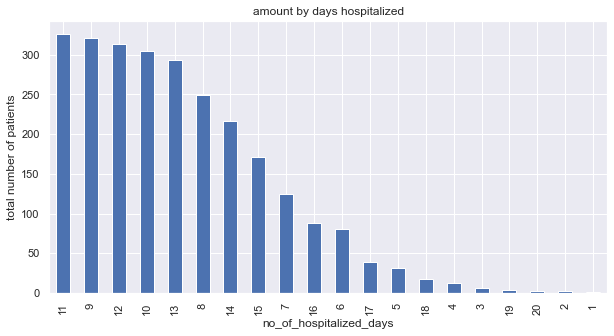

In [124]:
#Analysis of one variable with count 
df.no_of_hospitalized_days.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("amount by days hospitalized")
plt.ylabel('total number of patients')
plt.xlabel('no_of_hospitalized_days')

In [123]:
df.no_of_hospitalized_days.value_counts().nlargest(40)

11    326
9     321
12    314
10    305
13    294
8     249
14    217
15    171
7     125
16     88
6      81
17     39
5      32
18     18
4      13
3       6
19      4
20      2
2       2
1       1
Name: no_of_hospitalized_days, dtype: int64

<AxesSubplot:xlabel='agegrp', ylabel='sum'>

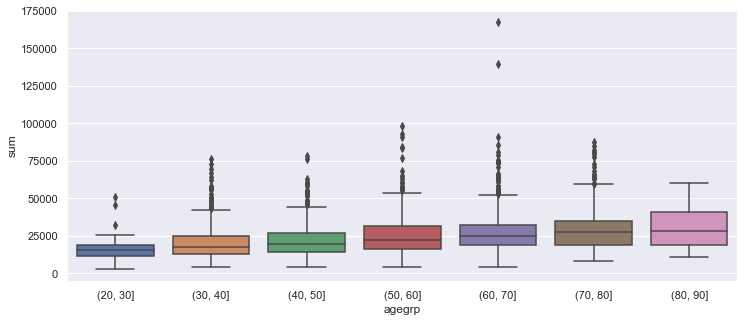

In [85]:
plt.figure(figsize=(12,5))
sns.boxplot(x = "agegrp", y = "sum", data=df)

In [125]:
df.head()

,bill_id,amount,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,...,height,gender,race,resident_status,date_of_birth,age,agegrp,no_of_hospitalized_days,sum,bmi
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,...,166,Female,Malay,Singaporean,1967-05-15,45.471233,"(40, 50]",12,32674.053703,19.608434
1,7968360812,951.214467,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,...,161,Male,Indian,Singaporean,1976-12-19,34.057534,"(30, 40]",10,35305.000362,22.142857
5,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28,2014-10-11,0,0.0,0,0,0.0,...,162,Female,Chinese,Singapore citizen,1973-05-28,41.364384,"(40, 50]",13,19018.637468,22.376543
7,6180579974,19900.297090,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,...,160,Female,Malay,Singaporean,1978-07-20,32.473973,"(30, 40]",10,23303.000928,24.500000
12,1148334643,6469.605351,1ce104904e9160cf3cfdb3c45b9ce4ff,2014-01-16,2014-01-26,1,1.0,1,0,1.0,...,162,Female,Chinese,PR,1980-06-21,33.594521,"(30, 40]",10,22370.242819,21.296296


<AxesSubplot:xlabel='agegrp', ylabel='sum'>

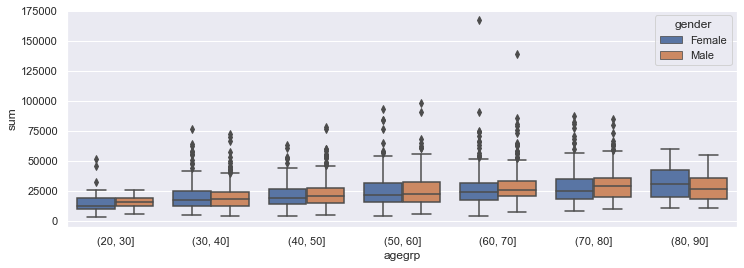

In [86]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = "agegrp", y = "sum", hue = "gender", data=df)

<AxesSubplot:xlabel='gender', ylabel='age'>

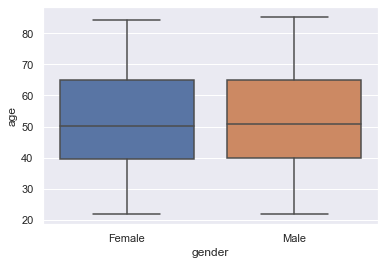

In [87]:
sns.boxplot(x = "gender", y = "age", data=df)

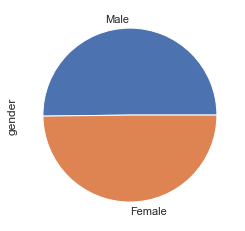

In [88]:
#calculate the percentage of gender category.
df.gender.value_counts(normalize=True)

#plot the pie chart of education categories
df.gender.value_counts(normalize=True).plot.pie()
plt.show()

In [119]:
df.groupby('no_of_hospitalized_days')["symptom_5"].value_counts().unstack()


symptom_5,0,1
no_of_hospitalized_days,,
1,NaN,1.0
2,2.0,NaN
3,4.0,2.0
4,4.0,9.0
5,22.0,10.0
6,45.0,36.0
7,60.0,65.0
8,112.0,137.0
9,160.0,161.0


In [120]:
df.groupby('agegrp')["medical_history_1"].value_counts().unstack()

medical_history_1,0,1
agegrp,,
"(20, 30]",52,9
"(30, 40]",525,96
"(40, 50]",505,91
"(50, 60]",359,79
"(60, 70]",379,89
"(70, 80]",298,72
"(80, 90]",43,11


In [121]:
df.groupby('race')["medical_history_1"].value_counts().unstack()


medical_history_1,0,1
race,,
Chinese,1394,277
Indian,216,44
Malay,444,98
Others,107,28


In [122]:
df.groupby('no_of_hospitalized_days')["medical_history_1"].value_counts().unstack()


medical_history_1,0,1
no_of_hospitalized_days,,
1,1.0,NaN
2,1.0,1.0
3,4.0,2.0
4,11.0,2.0
5,25.0,7.0
6,62.0,19.0
7,102.0,23.0
8,209.0,40.0
9,267.0,54.0


In [53]:
df.groupby('agegrp')["preop_medication_4"].value_counts().unstack()

preop_medication_4,0,1
agegrp,,
"(20, 30]",112,144
"(30, 40]",1332,1436
"(40, 50]",1228,1432
"(50, 60]",888,1060
"(60, 70]",1124,964
"(70, 80]",756,876
"(80, 90]",96,144


In [54]:
df.groupby('agegrp')["preop_medication_2"].value_counts().unstack()

preop_medication_2,0,1
agegrp,,
"(20, 30]",80,176
"(30, 40]",1148,1620
"(40, 50]",1128,1532
"(50, 60]",792,1156
"(60, 70]",848,1240
"(70, 80]",688,944
"(80, 90]",96,144


In [55]:
df.groupby('agegrp')["medical_history_1"].value_counts().unstack()

medical_history_1,0,1
agegrp,,
"(20, 30]",216,40
"(30, 40]",2352,416
"(40, 50]",2220,440
"(50, 60]",1588,360
"(60, 70]",1708,380
"(70, 80]",1328,304
"(80, 90]",192,48


In [56]:
df.groupby(["agegrp", "gender"])["race"].value_counts().unstack()

race             Chinese  Indian  Malay  Others
agegrp   gender                                
(20, 30] Female       92       8     24      12
         Male         84      12     16       8
(30, 40] Female      844     184    328      36
         Male        912     144    252      68
(40, 50] Female      900     132    248      76
         Male        844     128    272      60
(50, 60] Female      600      60    228      56
         Male        664      84    204      52
(60, 70] Female      648     120    228      76
         Male        632      88    244      52
(70, 80] Female      476      92    156      56
         Male        580      80    156      36
(80, 90] Female       52      20     20       4
         Male         92      28     16       8

In [57]:
##Bivariate analysis

In [59]:
#age vs symptoms

In [174]:
#multivariate regression analysis


In [91]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm


X = df[['medical_history_1','medical_history_2','medical_history_4','medical_history_5','medical_history_6','medical_history_7','preop_medication_1','preop_medication_2','preop_medication_3','preop_medication_4','preop_medication_5','preop_medication_6','symptom_1','symptom_2','symptom_3','symptom_4','symptom_5']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['sum']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
#New_Interest_Rate = 2.75
#New_Unemployment_Rate = 5.3
#print ('Predicted: \n', regr.predict([[preop_medication_1,preop_medication_2]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 6701.559069493007
Coefficients: 
 [ 6763.23425248   738.8953206   -629.70437263  2346.4457279
  3653.20390479   586.95219159   267.72606065   535.10331726
  -528.14165062   898.58469974   164.85148159   315.1822712
  2620.77046524  3506.95553274  3655.63111907  3271.85072388
 11196.28771019]
                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     60.81
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          1.75e-174
Time:                        12:44:31   Log-Likelihood:                -28049.
No. Observations:                2608   AIC:                         5.613e+04
Df Residuals:                    2590   BIC:                         5.624e+04
Df Model:                          17                         

In [92]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [93]:
mosthighlycorrelated(X, 5)

,FirstVariable,SecondVariable,Correlation
0,symptom_2,symptom_3,-0.054535
1,preop_medication_4,symptom_4,0.053706
2,preop_medication_5,symptom_5,-0.050077
3,medical_history_6,preop_medication_3,-0.042535
4,preop_medication_4,preop_medication_5,0.042417


In [ ]:
##correlation matrix

In [94]:
# Identifying correlation between independent variables(other variables mentioned below) and dependant variable(sum)
df1=df[['sum', 'medical_history_1', 'medical_history_2',
       'medical_history_3', 'medical_history_4', 'medical_history_5',
       'medical_history_6', 'medical_history_7', 'preop_medication_1',
       'preop_medication_2', 'preop_medication_3', 'preop_medication_4',
       'preop_medication_5', 'preop_medication_6','symptom_1','symptom_2','symptom_3','symptom_4','symptom_5']]

In [95]:
df1.corr()

,sum,medical_history_1,medical_history_2,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5
sum,1.000000,0.186970,0.024876,-0.011543,0.046867,0.123958,0.007623,0.030582,0.029292,-0.021947,0.041646,-0.015694,0.012754,0.104462,0.108593,0.139379,0.112104,0.419572
medical_history_1,0.186970,1.000000,0.000247,-0.017809,-0.007433,-0.006206,-0.003023,0.023111,-0.003909,-0.005096,-0.008697,0.003157,-0.017500,-0.007115,-0.034799,0.038570,-0.010761,-0.002412
medical_history_2,0.024876,0.000247,1.000000,0.039431,-0.006092,-0.007291,-0.030996,0.033964,0.005695,-0.008392,0.018231,-0.015964,0.025607,-0.001033,0.005868,-0.014102,0.013832,-0.000535
medical_history_4,-0.011543,-0.017809,0.039431,1.000000,0.001733,-0.039918,-0.007684,-0.022418,-0.001828,0.010732,-0.027350,0.025616,0.005333,0.032113,-0.016707,0.034468,-0.031323,0.012888
medical_history_5,0.046867,-0.007433,-0.006092,0.001733,1.000000,0.022399,0.013775,0.001025,-0.018545,-0.009740,0.031368,0.015389,0.009038,0.010052,0.005563,-0.034636,0.011560,0.006350
medical_history_6,0.123958,-0.006206,-0.007291,-0.039918,0.022399,1.000000,-0.007183,0.015422,0.035721,-0.042535,0.008575,-0.014922,-0.005322,0.029421,-0.002347,0.000177,-0.002007,0.002669
medical_history_7,0.007623,-0.003023,-0.030996,-0.007684,0.013775,-0.007183,1.000000,0.006642,-0.014805,0.002018,0.031858,-0.013635,-0.017559,-0.006835,-0.031624,0.013339,0.005415,-0.019875
preop_medication_1,0.030582,0.023111,0.033964,-0.022418,0.001025,0.015422,0.006642,1.000000,0.007675,0.003171,-0.002903,-0.015839,-0.002250,0.027674,-0.005980,-0.025042,0.031000,0.027102
preop_medication_2,0.029292,-0.003909,0.005695,-0.001828,-0.018545,0.035721,-0.014805,0.007675,1.000000,-0.019948,0.014967,0.009544,-0.004683,0.011178,0.019069,0.009625,-0.014300,0.007242
preop_medication_3,-0.021947,-0.005096,-0.008392,0.010732,-0.009740,-0.042535,0.002018,0.003171,-0.019948,1.000000,-0.004307,0.018791,-0.002626,-0.009473,0.011362,0.005060,0.001134,-0.002151


In [96]:
corr_mat=df1.corr()
corr_mat

,sum,medical_history_1,medical_history_2,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5
sum,1.000000,0.186970,0.024876,-0.011543,0.046867,0.123958,0.007623,0.030582,0.029292,-0.021947,0.041646,-0.015694,0.012754,0.104462,0.108593,0.139379,0.112104,0.419572
medical_history_1,0.186970,1.000000,0.000247,-0.017809,-0.007433,-0.006206,-0.003023,0.023111,-0.003909,-0.005096,-0.008697,0.003157,-0.017500,-0.007115,-0.034799,0.038570,-0.010761,-0.002412
medical_history_2,0.024876,0.000247,1.000000,0.039431,-0.006092,-0.007291,-0.030996,0.033964,0.005695,-0.008392,0.018231,-0.015964,0.025607,-0.001033,0.005868,-0.014102,0.013832,-0.000535
medical_history_4,-0.011543,-0.017809,0.039431,1.000000,0.001733,-0.039918,-0.007684,-0.022418,-0.001828,0.010732,-0.027350,0.025616,0.005333,0.032113,-0.016707,0.034468,-0.031323,0.012888
medical_history_5,0.046867,-0.007433,-0.006092,0.001733,1.000000,0.022399,0.013775,0.001025,-0.018545,-0.009740,0.031368,0.015389,0.009038,0.010052,0.005563,-0.034636,0.011560,0.006350
medical_history_6,0.123958,-0.006206,-0.007291,-0.039918,0.022399,1.000000,-0.007183,0.015422,0.035721,-0.042535,0.008575,-0.014922,-0.005322,0.029421,-0.002347,0.000177,-0.002007,0.002669
medical_history_7,0.007623,-0.003023,-0.030996,-0.007684,0.013775,-0.007183,1.000000,0.006642,-0.014805,0.002018,0.031858,-0.013635,-0.017559,-0.006835,-0.031624,0.013339,0.005415,-0.019875
preop_medication_1,0.030582,0.023111,0.033964,-0.022418,0.001025,0.015422,0.006642,1.000000,0.007675,0.003171,-0.002903,-0.015839,-0.002250,0.027674,-0.005980,-0.025042,0.031000,0.027102
preop_medication_2,0.029292,-0.003909,0.005695,-0.001828,-0.018545,0.035721,-0.014805,0.007675,1.000000,-0.019948,0.014967,0.009544,-0.004683,0.011178,0.019069,0.009625,-0.014300,0.007242
preop_medication_3,-0.021947,-0.005096,-0.008392,0.010732,-0.009740,-0.042535,0.002018,0.003171,-0.019948,1.000000,-0.004307,0.018791,-0.002626,-0.009473,0.011362,0.005060,0.001134,-0.002151


In [98]:
corr_mat['sum'].sort_values(ascending=False)

sum                   1.000000
symptom_5             0.419572
medical_history_1     0.186970
symptom_3             0.139379
medical_history_6     0.123958
symptom_4             0.112104
symptom_2             0.108593
symptom_1             0.104462
medical_history_5     0.046867
preop_medication_4    0.041646
preop_medication_1    0.030582
preop_medication_2    0.029292
medical_history_2     0.024876
preop_medication_6    0.012754
medical_history_7     0.007623
medical_history_4    -0.011543
preop_medication_5   -0.015694
preop_medication_3   -0.021947
Name: sum, dtype: float64

<AxesSubplot:>

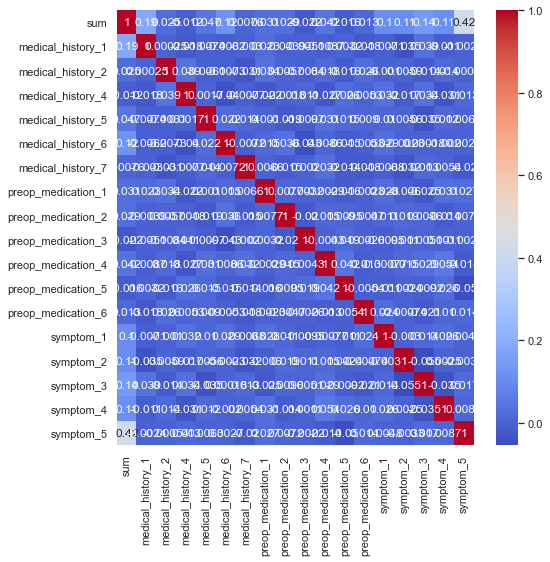

In [99]:
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(),annot=True, cmap='coolwarm')

In [112]:
df2=df[['sum', 'age','race','resident_status','no_of_hospitalized_days','lab_result_1','lab_result_2','lab_result_3']]

In [113]:
corr_mat=df2.corr()
corr_mat

,sum,age,no_of_hospitalized_days,lab_result_1,lab_result_2,lab_result_3
sum,1.000000,0.274793,0.002622,-0.014708,-0.013247,0.013571
age,0.274793,1.000000,0.014776,0.008338,0.003198,0.018746
no_of_hospitalized_days,0.002622,0.014776,1.000000,0.021711,-0.035864,-0.022592
lab_result_1,-0.014708,0.008338,0.021711,1.000000,0.019929,-0.002633
lab_result_2,-0.013247,0.003198,-0.035864,0.019929,1.000000,0.016899
lab_result_3,0.013571,0.018746,-0.022592,-0.002633,0.016899,1.000000


In [114]:
corr_mat['sum'].sort_values(ascending=False)

sum                        1.000000
age                        0.274793
lab_result_3               0.013571
no_of_hospitalized_days    0.002622
lab_result_2              -0.013247
lab_result_1              -0.014708
Name: sum, dtype: float64

<AxesSubplot:>

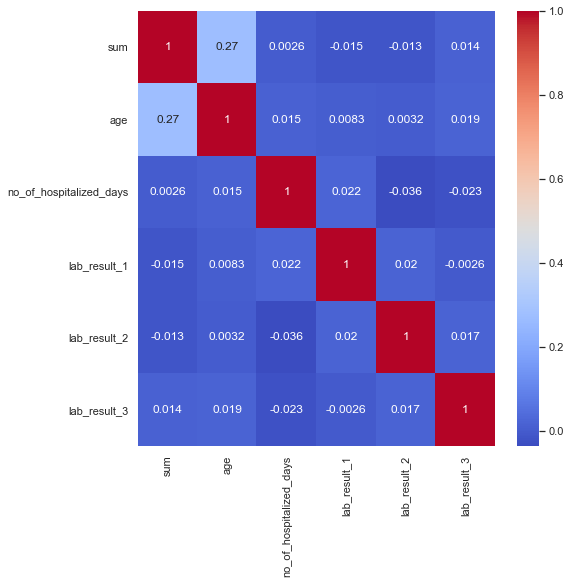

In [115]:
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(),annot=True, cmap='coolwarm')

In [ ]:
#detailed analysis of top 5 contributers to cost
#COST DRIVERS
#symptom_5             0.419572
#medical_history_1     0.186970
#symptom_3             0.139379
#medical_history_6     0.123958
#symptom_4             0.112104

In [162]:
#total number of patients with symptom_5
df.symptom_5.value_counts()

1    1378
0    1230
Name: symptom_5, dtype: int64

In [171]:
#presence/absence of symptom_5 based on race
df.groupby('race')["symptom_5"].value_counts().sort_values(ascending=False)

race     symptom_5
Chinese  1            864
         0            807
Malay    1            284
         0            258
Indian   1            160
         0            100
Others   1             70
         0             65
Name: symptom_5, dtype: int64

In [172]:
#presence/absence of symptom_5 based on age group
df.groupby('agegrp')["symptom_5"].value_counts().sort_values(ascending=False)

agegrp    symptom_5
(40, 50]  1            327
(30, 40]  1            316
          0            305
(40, 50]  0            269
(60, 70]  1            256
(50, 60]  1            229
(60, 70]  0            212
(50, 60]  0            209
(70, 80]  1            199
          0            171
(20, 30]  0             34
(80, 90]  0             30
(20, 30]  1             27
(80, 90]  1             24
Name: symptom_5, dtype: int64

In [173]:
#presence/absence of symptom_5 based on gender
df.groupby('gender')["symptom_5"].value_counts().sort_values(ascending=False)

gender  symptom_5
Male    1            696
Female  1            682
        0            617
Male    0            613
Name: symptom_5, dtype: int64